In [32]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt

In this Jupyter Notebook a Linear Algebra interpretaion of [PageRank](https://en.wikipedia.org/wiki/PageRank) will be used to determine the density of population of Ukrainians in Poland. The underlying intuition behind this takes it's roots from the fact that one could not know where season workers / migrants would settle in Poland, but the business and market should handle this. I would build a network of cities/districts and train a Page Rank alghorithm, trying to converge the power method to find out the rank of each city in Poland and Ukraine that is linked to a network via bus routes. Ukrainian cities/districts would be removed from the list so ranks would be calculated for a subnetwork of Polish cities/regions.

In [33]:
stops = pd.read_csv('poland_bus_routes_geocoded.csv')
stops.head()

,Unnamed: 0,id,rejs_number,stop_city_name,stop_address,stop_code,route_frequency,distance_direct,arrival_direct,departure_direct,...,arrival_return,departure_return,time_diff_return,stop_number,full_address,lat,lng,country,region,city
0,0,PL944,1,Жовква,пл. Коновальця 1,4622710100,Щоденно,0,4:20,4:40,...,14:55,NaN,0,0.0,"Жовква, пл. Коновальця 1",50.056643,23.972478,Ukraine,Lvivska oblast,Zhovkivskyi district
1,1,PL944,1,Рава Руська,"вул. Двірцева, 4",4622710400,Щоденно,32,5:25,5:30,...,14:05,14:10,0,1.0,"Рава Руська, вул. Двірцева, 4",50.230071,23.636844,Ukraine,Lvivska oblast,Zhovkivskyi district
2,2,PL944,1,Томашів Любельський,"ul. Zamojska, 9",22-600,Щоденно,63,6:05,NaN,...,11:00,11:30,0,4.0,"Томашів Любельський, ul. Zamojska, 9",50.454665,23.419679,Poland,lubelskie,tomaszowski
3,3,PL944,2,Жовква,пл. Коновальця 1,4622710100,Щоденно,0,21:50,22:10,...,6:25,NaN,0,5.0,"Жовква, пл. Коновальця 1",50.056643,23.972478,Ukraine,Lvivska oblast,Zhovkivskyi district
4,4,PL944,2,Рава Руська,"вул. Двірцева, 4",4622710400,Щоденно,32,22:55,23:00,...,5:35,5:40,0,6.0,"Рава Руська, вул. Двірцева, 4",50.230071,23.636844,Ukraine,Lvivska oblast,Zhovkivskyi district


In [34]:
# Remove Ukrainian cities from the list
stops = stops.loc[stops['country'] == 'Poland']

In [35]:
stops['city'] = stops['city'].astype('category')

In [36]:
stops['city_cat'] = stops['city'].cat.codes

In [37]:
connections = []

In [38]:
for route in tqdm(np.unique(stops.id)):
    route_direction = stops.loc[stops['id'] == route].sort_values(by=['stop_number'])
    ind = 0
    while ind < route_direction.shape[0] - 1:
        connections.append([route_direction.iloc[ind].city_cat, route_direction.iloc[ind + 1].city_cat])
        ind += 1
        

100%|██████████| 477/477 [00:04<00:00, 115.19it/s]


In [39]:
print(connections[:10])

[[8, 42], [8, 8], [8, 8], [8, 8], [51, 85], [85, 97], [97, 192], [79, 79], [79, 79], [79, 79]]


In [40]:
connections = pd.DataFrame(connections, columns = ['start_code', 'stop_code']) 

In [41]:
connections.head(20)

,start_code,stop_code
0,8,42
1,8,8
2,8,8
3,8,8
4,51,85
5,85,97
6,97,192
7,79,79
8,79,79
9,79,79


In [42]:
max_city_category = max(max(connections.start_code), max(connections.stop_code))
max_city_category

201

Hereunder a matrix of connections would be builded. Each node connection would be constructed as the number of incoming connections divided by number of outgoing connections.

In [43]:
links_matrix = np.zeros((max_city_category + 1, max_city_category + 1))

In [44]:
for stop in tqdm(np.unique(stops['city_cat'])):
    incoming = connections.loc[connections['stop_code'] == stop]
    outgoing = connections.loc[connections['start_code'] == stop]
    if outgoing.shape[0] == 0:
        continue
    value = incoming.shape[0] / outgoing.shape[0]
    for out in outgoing.stop_code:
        links_matrix[stop][out] = value

100%|██████████| 202/202 [00:00<00:00, 224.03it/s]


In [45]:
# Check for possible NaNs
np.isnan(np.min(links_matrix))

False

In [46]:
links_matrix = links_matrix.transpose()

In [47]:
eigv = np.ones((max_city_category + 1, 1)) * 1 / max_city_category
eigv

array([[0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.00497512],
       [0.004

In [48]:
err = 0.0000000001

def power_iteration(e, A):
    prod = A.dot(e)
    iteration = 0
    while np.linalg.norm(prod - e) > err:
        e = prod
        prod = A.dot(e)
        if np.isnan(prod).any() or np.isinf(prod).any():
            prod = e
            break
        iteration += 1
    print("Converged in " + str(iteration) + " iterations")
    return prod

In [49]:
ranks = power_iteration(eigv.astype(np.float128),  links_matrix.astype(np.float128))

Converged in 5967 iterations


In [50]:
def normalize_columns(arr):
    rows, cols = arr.shape
    for col in range(cols):
        arr[:,col] /= abs(arr[:,col]).max()
    return arr
        
ranks = normalize_columns(ranks)

In [51]:
coordinates = stops[['lat', 'lng', 'city', 'city_cat']].groupby('city').mean()
coordinates['city_rank'] = ranks[:,0]
coordinates.head()

,lat,lng,city_cat,city_rank
city,,,,
Białystok,53.131274,23.134503,0,0.018676
Bielsko-Biała,49.825946,19.051880,1,0.019057
Bolesławiec County,51.265855,15.565740,2,0.140312
Brzeg County,50.860851,17.466831,3,0.036147
Bydgoszcz,53.122432,18.018419,4,0.322696


### Plotting

In [105]:
cities = {
    'Gdansk': {'pos': (54.36, 18.64)},
    'Gliwice': {'pos': (50.31, 18.67)},
    'Krakow': {'pos': (50.06, 19.96)},
    'Lodz': {'pos': (51.77, 19.46)},
    'Lublin': {'pos': (51.24, 22.57)},
    'Poznan': {'pos': (52.4, 16.9)},
    'Szczecin': {'pos': (53.43, 14.53)},
    'Torun': {'pos': (52.9823, 18.6552)},
    'Wroclaw': {'pos': (51.11, 17.03)},
    'Zakopane': {'pos': (49.29, 19.96)}
    
}

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


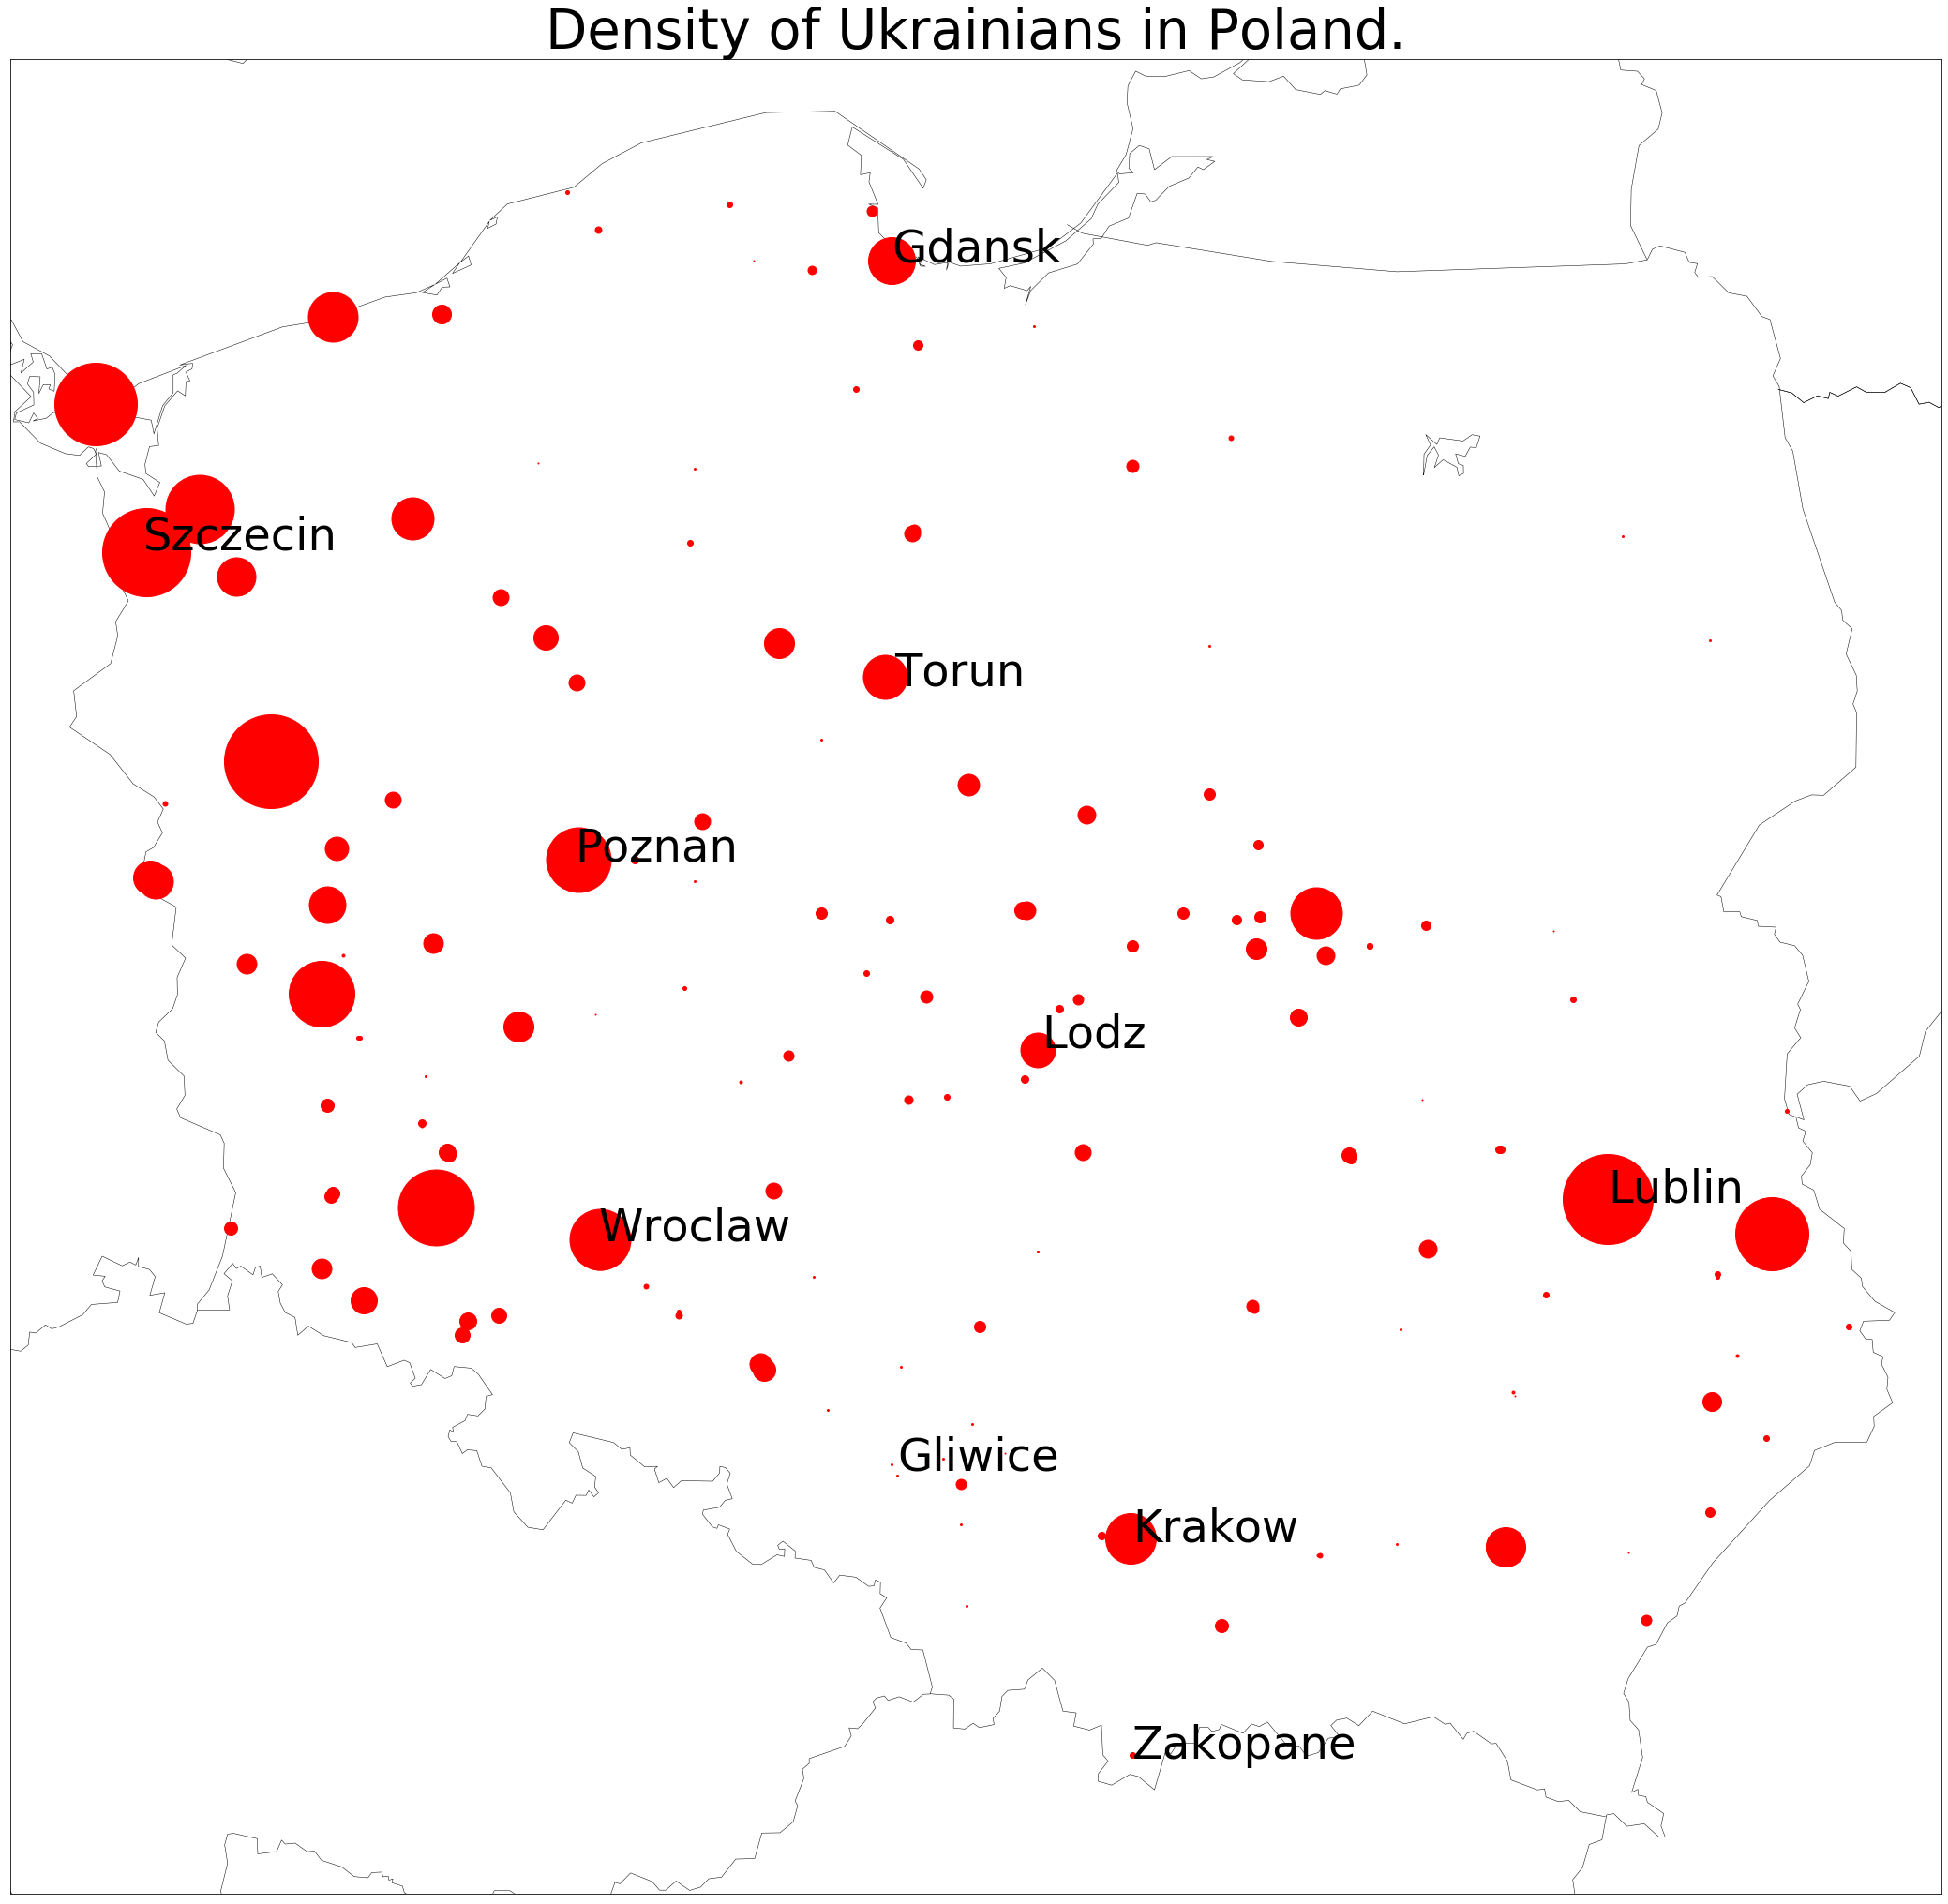

In [129]:
plt.rcParams.update({'font.size': 48})    
fig = plt.figure(figsize=(40.0, 36.0))
lat_min, lat_max = 48.8, 55.0
lon_min, lon_max = 13.8, 24.4
m = Basemap(resolution='i', projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
for index, c in coordinates.iterrows():
    x, y = m(np.asscalar(round(c.lng, 2).astype('float')), np.asscalar(round(c.lat, 2).astype('float')))
    size = np.asscalar(round(c.city_rank * 100).astype('float'))
    m.plot(x, y, 'ro', markersize=size)
for name, data in cities.items():
    x, y = m(data['pos'][1], data['pos'][0])
    plt.text(x, y, name)

    
plt.title("Density of Ukrainians in Poland.")

plt.show()